<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Histogramas</h2>


## PARTE I: Procesamiento *global* vs *local* 

## Docente

#### Autor: Pedro Latorre Carmona

## Alumno: Pablo Fernández Gumiel

Curso 2025-2026

Versión 1.0

## Enunciado de la práctica

En esta práctica, vamos a analizar los potenciales beneficios de aplicar alguna técnica de extensión del rango dinámico de una imagen, de forma global, y de forma local.

Los objetivos a cubrir en esta práctica van a ser los siguientes:

1. Analizar y entender la distribución de niveles de gris de la imagen **GreyScaleMicroscopyImage.png**.


2. Plantear un método de transformación del histograma *por partes* dmediante linealización, adecuado para la totalidad de la imagen. Debemos dar la posibilidad al usuario de introducir los puntos sobre los que quiere aplicar la tranformacion lineal. No hace falta comprobacion de errores y los valores que puede introducir son de 0 a 255. Simpre se nace del punto 00 para generar la primera recta de tranformación lineal. Hay que calcular la ecuación de la recta punto pendiente.


3. Programar la posibilidad de *trocear la imagen en partes*, obtener el histograma de cada una de ellas, y definir un método alternativo de transformación del histograma por partes, que se adapte mejor a estas *imágenes locales*. La clave aqui es que la función(ecuación) que permite la linealizacion or trozos sea capaz de actuar en las diviones de la imagen por separado.


4. Hacer un programa que a partir de las *imágenes parciales* obtenidas en "3.", genere una nueva imagen *resultante*.

5. Es importante comparar entre las dos imagenes transformadas para ver las diferencias

**NOTAS**: 

**(A)** Tened en cuenta que la imagen es de $24$ bits. Es decir, es una matriz $3D$ de tamaño: $M\times N\times 3$, donde la tercera dimensión es el número de canales. Debéis transformarla a imagen en escala de grises (1 solo canal), y aseguraros que el rango dinámico en el que se expresa esta imagen es: $[0, 255]$ ($8$ bits).

**(B)** Para representar el histograma asociado a una imagen podéis utilizar el método: **np.histogram**. Pensad en argumentos de entrada, etc.

Dimensiones de la imagen en grises: (392, 655)
Rango de valores: [0, 249]


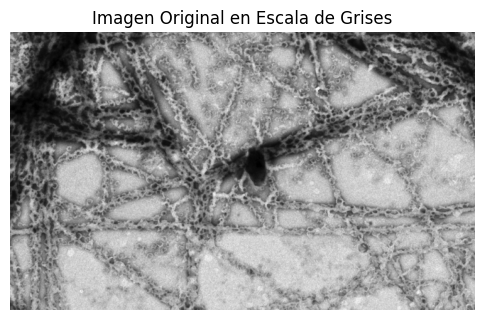

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, util


image_rgb = io.imread('GreyScaleMicroscopyImage.png')
# Convertir a escala de grises (float en [0, 1]) y luego a 8 bits (uint8 en [0, 255])
image_gray_8bit = util.img_as_ubyte(color.rgb2gray(image_rgb))

print(f"Dimensiones de la imagen en grises: {image_gray_8bit.shape}")
print(f"Rango de valores: [{np.min(image_gray_8bit)}, {np.max(image_gray_8bit)}]")

# Mostramos la imagen de partida
plt.figure(figsize=(6, 6))
plt.imshow(image_gray_8bit, cmap='gray', vmin=0, vmax=255)
plt.title('Imagen Original en Escala de Grises')
plt.axis('off')
plt.show()

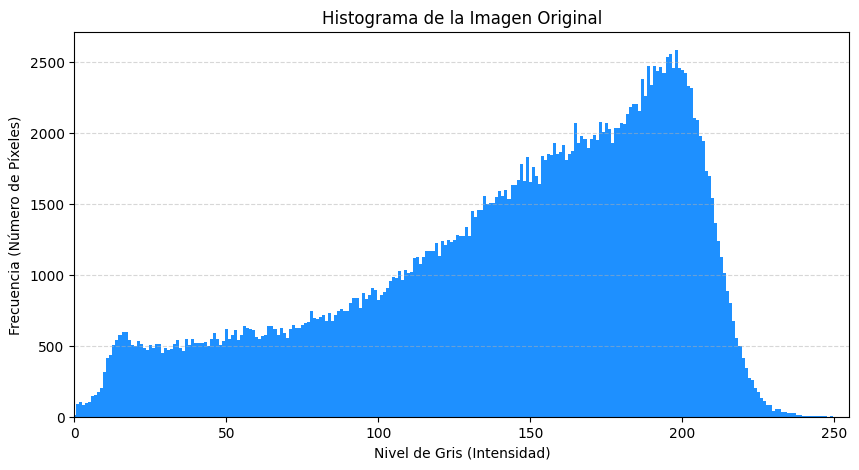

In [47]:
# --- Objetivo 1: Analizar el Histograma ---

# Calcular el histograma usando np.histogram
# .ravel() convierte la matriz 2D en un array 1D para el cálculo
hist, bins = np.histogram(image_gray_8bit.ravel(), bins=256, range=[0, 256])

# Visualizar el histograma
plt.figure(figsize=(10, 5))
plt.bar(bins[:-1], hist, width=1, color='dodgerblue')
plt.title('Histograma de la Imagen Original')
plt.xlabel('Nivel de Gris (Intensidad)')
plt.ylabel('Frecuencia (Número de Píxeles)')
plt.xlim([0, 255])
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()


--- Definición de la Transformación Global ---


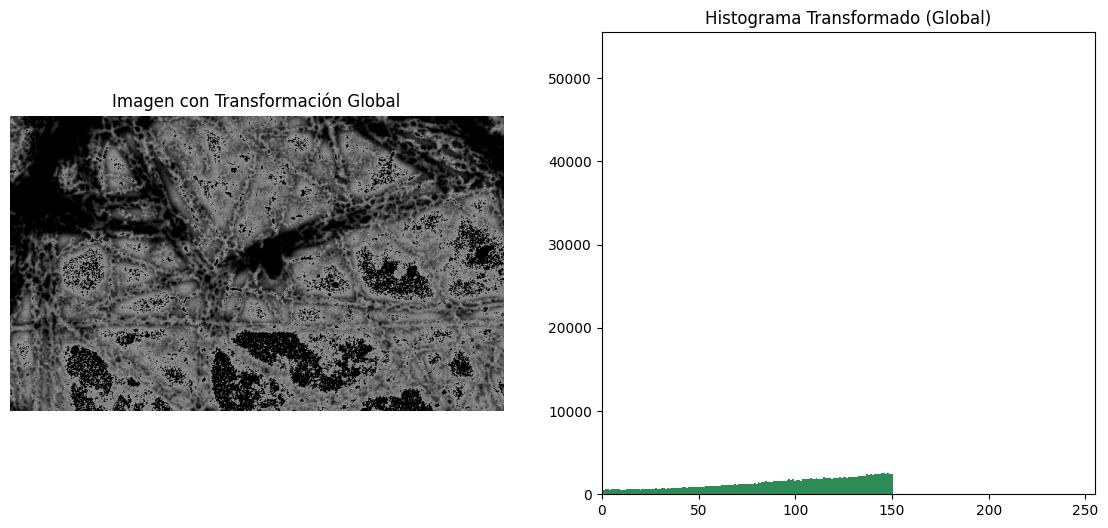

: 

In [ ]:
# --- Objetivo 2: Transformación Global ---

# Renombra o reutiliza tu función de transformación lineal. El código interno es el mismo.
def aplicar_transformacion_lineal(segmento, points):
    """
    Aplica una transformación lineal por partes a un segmento (bloque) de imagen.
    'points' es una lista de tuplas (r, s).
    """

    # ... (el código de la función es idéntico al de 'transformacion_lineal_global')
    points = sorted(points)
    if not any(p[0] == 255 for p in points):
        points.append((255, points[-1][1]))

    lut = np.zeros(256, dtype=np.uint8)
    
    for i in range(len(points) - 1):
        r1, s1 = points[i]
        r2, s2 = points[i+1]
        
        if r2 - r1 == 0: continue
            
        m = (s2 - s1) / (r2 - r1)
        
        for r in range(r1, r2):
            s = s1 + m * (r - r1)
            lut[r] = np.clip(s, 0, 255)
    
    # Asegura que el último punto del rango se mapea correctamente
    if points:
        lut[points[-1][0]] = points[-1][1]
            
    return lut[segmento]

# --- Interacción con el usuario para definir los puntos ---
print("\n--- Definición de la Transformación Global ---")
num_points = int(input("Introduce el número de puntos para la transformación): "))
user_points = []
for i in range(num_points):
    r = int(input(f"Introduce el valor de entrada r{i+1} (0-255): "))
    s = int(input(f"Introduce el valor de salida s{i+1} (0-255): "))
    user_points.append((r, s))
# Ejemplo de puntos para estirar el contraste: [(80, 0), (150, 255)]

# Aplicar la transformación global
image_global_enhanced = transformacion_lineal_global(image_gray_8bit, user_points)

# --- Visualización de resultados globales ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].imshow(image_global_enhanced, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagen con Transformación Global')
axes[0].axis('off')

hist_global, _ = np.histogram(image_global_enhanced.ravel(), bins=256, range=[0, 256])
axes[1].bar(range(256), hist_global, width=1, color='seagreen')
axes[1].set_title('Histograma Transformado (Global)')
axes[1].set_xlim([0, 255])
plt.show()

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math

# --- Proceso Interactivo de Mejora Local (2x2 cuadrícula) ---

h, w = image_gray_8bit.shape
image_local_interactive = np.zeros_like(image_gray_8bit)

# Calcular el tamaño de los bloques para una división 2x2
num_div_h = 2
num_div_w = 2

block_h = math.ceil(h / num_div_h)
block_w = math.ceil(w / num_div_w)
block_size = (block_h, block_w)

print(f"\n--- INICIO DE LA MEJORA LOCAL INTERACTIVA (2x2 CUADRÍCULA) ---")
print(f"La imagen se dividirá en {num_div_h}x{num_div_w} = 4 bloques.")
print(f"El tamaño de cada bloque será aproximadamente: {block_size[0]}x{block_size[1]} píxeles.")

block_count = 0
block_map = {0: "Superior Izquierdo", 1: "Superior Derecho", 2: "Inferior Izquierdo", 3: "Inferior Derecho"}

# Iterar sobre la imagen en una cuadrícula de 2x2
for r_idx in range(num_div_h):
    for c_idx in range(num_div_w):
        block_count += 1
        
        # Calcular los límites del bloque actual
        r_start = r_idx * block_size[0]
        c_start = c_idx * block_size[1]
        r_end = min(r_start + block_size[0], h)
        c_end = min(c_start + block_size[1], w)
        
        # Extraer el bloque
        bloque_actual = image_gray_8bit[r_start:r_end, c_start:c_end]
        
        # --- Fase de Interacción ---
        with warnings.catch_warnings():
            warnings.simplefilter("ignore", UserWarning)
            # a) Mostrar el bloque actual y su histograma
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))
            fig.suptitle(f"Editando Bloque {block_count} ({block_map.get(block_count-1, 'Desconocido')})")
            
            axes[0].imshow(bloque_actual, cmap='gray', vmin=0, vmax=255)
            axes[0].set_title('Segmento Actual')
            axes[0].axis('off')
            
            hist_bloque, _ = np.histogram(bloque_actual.ravel(), bins=256, range=[0, 256])
            axes[1].bar(range(256), hist_bloque, width=1, color='darkorange')
            axes[1].set_title('Histograma del Segmento')
            axes[1].set_xlim([0, 255])
            
            print(f"\nObserva la ventana de Matplotlib para el Bloque {block_count}. Ciérrala para continuar.")
            plt.show(block=True)

        # b) Pedir los puntos al usuario para este bloque
        print(f"--- Definiendo transformación para el Bloque {block_count} ---")
        user_points = []
        try:
            num_points = int(input("Introduce el número de puntos para la transformación: "))
            for i in range(num_points):
                r = int(input(f"  Introduce r{i+1} (0-255): "))
                s = int(input(f"  Introduce s{i+1} (0-255): "))
                user_points.append((r, s))
        except ValueError:
            print("Entrada inválida. No se aplicarán cambios a este bloque.")
            user_points = []
        
        # c) Aplicar la transformación y guardar el resultado
        bloque_transformado = aplicar_transformacion_lineal(bloque_actual, user_points)
        image_local_interactive[r_start:r_end, c_start:c_end] = bloque_transformado
        
        print(f"Bloque {block_count} procesado.")

print("\n--- PROCESO INTERACTIVO COMPLETADO ---")

# --- Visualización del resultado final ---
plt.figure(figsize=(8, 8))
plt.imshow(image_local_interactive, cmap='gray', vmin=0, vmax=255)
plt.title('Resultado de Mejora Local Interactiva (2x2)')
plt.axis('off')
plt.show()

NameError: name 'image_gray_8bit' is not defined

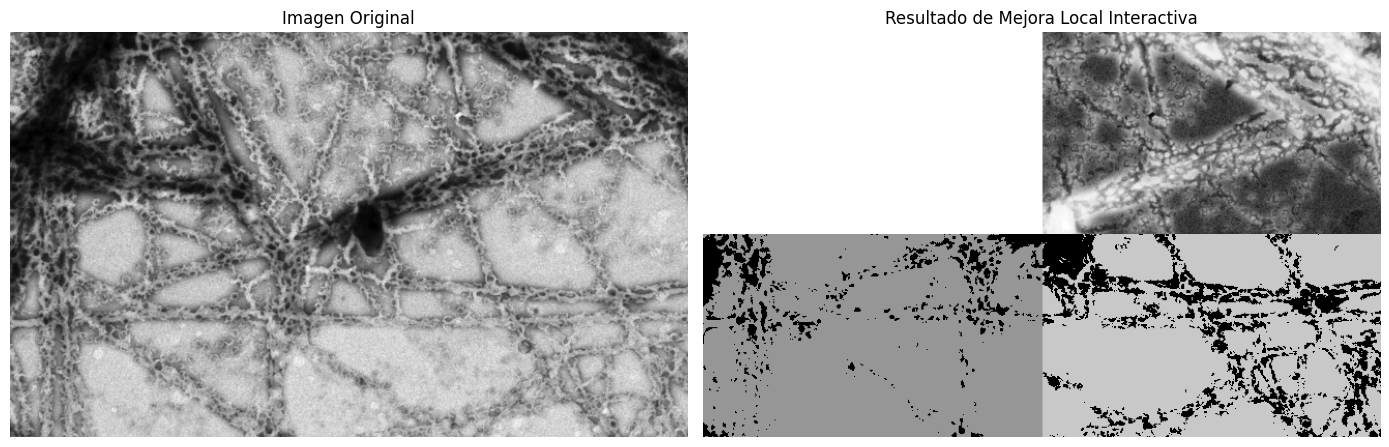

In [40]:
# --- Objetivo 5: Comparación Final ---

fig, axes = plt.subplots(1, 2, figsize=(14, 7)) # O 1,3 si quieres comparar con la global también

axes[0].imshow(image_gray_8bit, cmap='gray', vmin=0, vmax=255)
axes[0].set_title('Imagen Original')
axes[0].axis('off')

# Asegúrate de que esta variable coincide con la que has creado en el paso 3
axes[1].imshow(image_local_interactive, cmap='gray', vmin=0, vmax=255)
axes[1].set_title('Resultado de Mejora Local Interactiva')
axes[1].axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(imagen.shape)

In [ ]:
print(imagen[2][3])